In [1]:
import matplotlib.pyplot as plt
from collections import defaultdict
import csv

In [22]:
def plot_results(path_to_results, name, save=False):
    acc = defaultdict(list)
    models = []

    with open(path_to_results) as f:
        reader = csv.DictReader(f)

        for row in reader:
            model = row['Model']
            models.append(model)
            for key in ("Overall","Curb Ramp","Missing Ramp","Obstruction","Sfc Problem","Null"):
                acc[key].append( float(row[key]) )
                
    fancy_models = ['DC Baseline', 'DC+{}', '{}', '{},\ninit with DC']
    fancy_models = map(lambda x: str.format(x, name), fancy_models)

    plt.figure(figsize=(7,7))
    for label, color in (('Curb Ramp', 'C2'), ('Missing Ramp', 'C3'), ('Obstruction','C0'), ('Sfc Problem','C1'), ('Null','C4'), ('Overall','black')):
        style = {"linestyle"   : 'dashed' if label != 'Overall' else 'solid',
                 "marker"      : 'o',
                 "linewidth"   : 1 if label != 'Overall' else 3,
                 "label"       : label,
                 "color"       : color
                }
        if label == 'Overall':
            style['alpha'] = .6
        plt.plot(fancy_models, acc[label], **style)

    plt.xlabel("Dataset used for Training")
    plt.ylabel('Recall (%)')
    plt.ylim((0,100))
    plt.legend()
    
    if save:
        savename = "{}_acc".format(name.lower())
        plt.savefig('/Users/galenweld/sidewalk-cv-assets19/figures_for_paper/pngs/{}.png'.format(savename), dpi = 300)

    plt.show()

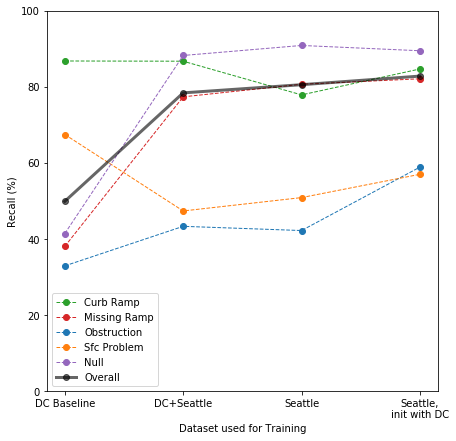

In [23]:
plot_results('seattle_results_for_figs_new.csv', "Seattle", save=True)

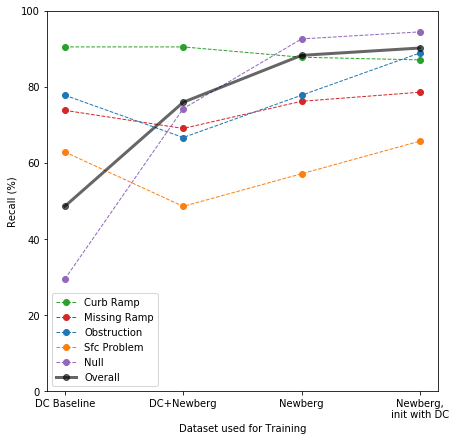

In [24]:
plot_results('newberg_results_for_figs.csv', "Newberg", save=True)

# let's do these together in one plot with subplots

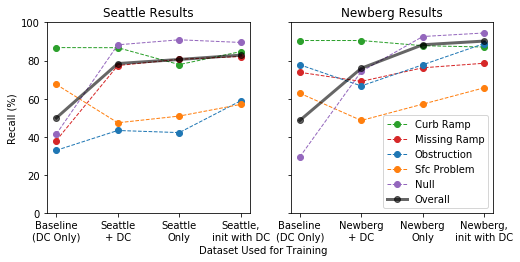

In [81]:
fig, axes = plt.subplots(1, 2, sharex='none', sharey='all', figsize=(8,3.51))


for i, (path_to_results, name) in enumerate((('seattle_results_for_figs_new.csv', "Seattle"), ('newberg_results_for_figs.csv', "Newberg"))):
    ax = axes[i]
    acc = defaultdict(list)
    models = []

    with open(path_to_results) as f:
        reader = csv.DictReader(f)

        for row in reader:
            model = row['Model']
            models.append(model)
            for key in ("Overall","Curb Ramp","Missing Ramp","Obstruction","Sfc Problem","Null"):
                acc[key].append( float(row[key]) )
                
    fancy_models = ['Baseline\n(DC Only)', '{}\n+ DC', '{}\nOnly', '{},\ninit with DC']
    fancy_models = map(lambda x: str.format(x, name), fancy_models)

    for label, color in (('Curb Ramp', 'C2'), ('Missing Ramp', 'C3'), ('Obstruction','C0'), ('Sfc Problem','C1'), ('Null','C4'), ('Overall','black')):
        style = {"linestyle"   : 'dashed' if label != 'Overall' else 'solid',
                 "marker"      : 'o',
                 "linewidth"   : 1 if label != 'Overall' else 3,
                 "label"       : label,
                 "color"       : color
                }
        if label == 'Overall':
            style['alpha'] = .6
        ax.plot(fancy_models, acc[label], **style)


    if i==0: ax.set_ylabel('Recall (%)')
    if i==1: ax.legend()
    ax.set_ylim((0,100))
    ax.title.set_text(name+" Results")
fig.text(0.5, -0.02, 'Dataset Used for Training', ha='center', va='center')

#plt.legend()

savename = "{}_acc".format(name.lower())
plt.savefig('/Users/galenweld/sidewalk-cv-assets19/figures_for_paper/pngs/new_cities.png', dpi = 300, bbox_inches = "tight")

plt.show()

# aaaaaaaaand let's try this for precision, recall, and f1 all at once

In [134]:

def plot_results(metric, legend=None):
    fig, axes = plt.subplots(1, 2, sharex='none', sharey='all', figsize=(8,3.4))

    for i, (path_to_results, name) in enumerate((('seattle_{}.csv'.format(metric), "Seattle"), ('newberg_{}.csv'.format(metric), "Newberg"))):
        ax = axes[i]
        acc = defaultdict(list)
        models = []

        with open('csv_for_plotting/'+path_to_results) as f:
            reader = csv.DictReader(f)

            for row in reader:
                model = row['Model']
                models.append(model)
                for key in ("Overall","Curb Ramp","Missing Ramp","Obstruction","Sfc Problem","Null"):
                    acc[key].append( float(row[key]) )

        fancy_models = ['Baseline\n(DC Only)', '{}\n+ DC', '{}\nOnly', '{},\ninit with DC']
        fancy_models = map(lambda x: str.format(x, name), fancy_models)

        for label, color in (('Curb Ramp', 'C2'), ('Missing Ramp', 'C3'), ('Obstruction','C0'), ('Sfc Problem','C1'), ('Null','C4'), ('Overall','black')):
            style = {"linestyle"   : 'dashed' if label != 'Overall' else 'solid',
                     "marker"      : 'o',
                     "linewidth"   : 1 if label != 'Overall' else 3,
                     "label"       : label,
                     "color"       : color
                    }
            if label == 'Overall':
                style['alpha'] = .6
            ax.plot(fancy_models, acc[label], **style)

        fancy_label = {'precision' : 'Precision (%)', 'recall':'Recall (%)', 'f1':'f1-score'}
        if i==0: ax.set_ylabel(fancy_label[metric])
        if i==1 and legend is not None: ax.legend()
        if metric in ('precision', 'recall'):
            ax.set_ylim((0,100))
        else:
            ax.set_ylim(0,1)
        ax.title.set_text(name)
        ax.title.set_size(10)
    fig.text(0.5, -0.04, 'Dataset Used for Training', ha='center', va='center', fontsize=12)
    fig.text(.5, .95, fancy_label[metric][:-4], ha='center', va='center', fontsize=12)

    #plt.legend()

    savename = "{}_acc".format(name.lower())
    plt.savefig('csv_for_plotting/new_cities_{}.png'.format(metric), dpi = 300, bbox_inches = "tight")

    plt.show()

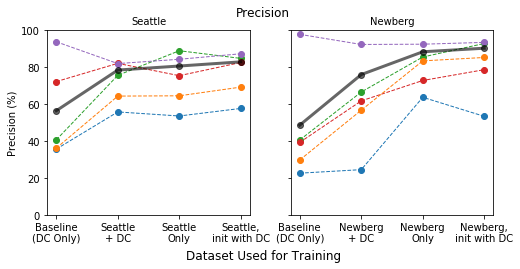

In [135]:
plot_results('precision')

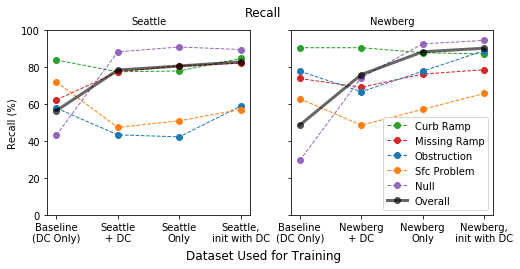

In [136]:
plot_results('recall', legend=True)

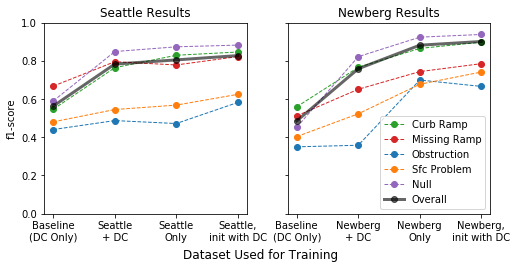

In [102]:
plot_results('f1')